In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [12]:
# Script definitions
# ------------------

# DAXPY - data_1.csv
# Histogram_1 - data_2.csv
# Histogram_2 - data_3.csv

data_file = '../../lab2/data/data_3.csv'
images_dir = '../images/histogram_2'

fixed_image = './images/grayscale_by_cols.pgm'


In [13]:
# Create the output directory if it doesn't exist
if not os.path.exists(images_dir):

	os.mkdir(images_dir)

else :

	os.system("rm -r " + images_dir)
	os.mkdir(images_dir)

In [14]:
# Load the data into a pandas DataFrame
data = pd.read_csv(data_file, sep=',', header=None)

# Add column names to the DataFrame
# DAXPY - printf("PAE,%d,%d,%d,%f,%f,%f,%f,%f,%f,%ld,%f,PAE\n", threadsPerBlock, blocksPerGrid, maxBlocksPerSM, occupancy, overhead, alloc_time, init_time, daxpy_time, total_time, n, alpha);
# Histogram - printf("\nPAE,%s,%d,%d,%d,%f,%f,%f,%f,%f,%f,%f,%f,%ld,PAE\n", imagePath, threadsPerBlock, blocksPerGrid, maxBlocksPerSM, occupancy, overhead, alloc_time, init_time, histogram_time, hd_time, dh_time, total_time, imageSize);

data.columns = ['imagePath', 'threadsPerBlock', 'blocksPerGrid', 'maxBlocksPerSM', 'occupancy', 'overhead', 'alloc_time', 'init_time', 'histogram_time', 'hd_time', 'dh_time', 'total_time', 'imageSize']

# Print total number of rows and columns in the DataFrame
print("Total rows: {0}".format(len(data)))

Total rows: 330


In [15]:
data = data[data['overhead'] < 0.1]

print("Total rows: {0}".format(len(data)))

Total rows: 330


In [16]:
data_filtered = data[data['imagePath'] == fixed_image]

df_filtered = data_filtered[['threadsPerBlock', 'occupancy', 'histogram_time']]

df_max_occupancy = df_filtered[df_filtered['occupancy'] == 1.0]

grouped = df_max_occupancy.groupby('threadsPerBlock')['histogram_time'].mean()

min_histogram_time = grouped.idxmin()

print("Threads per block to get min daxpy time with full occupancy: {0}".format(min_histogram_time))

Threads per block to get min daxpy time with full occupancy: 1024


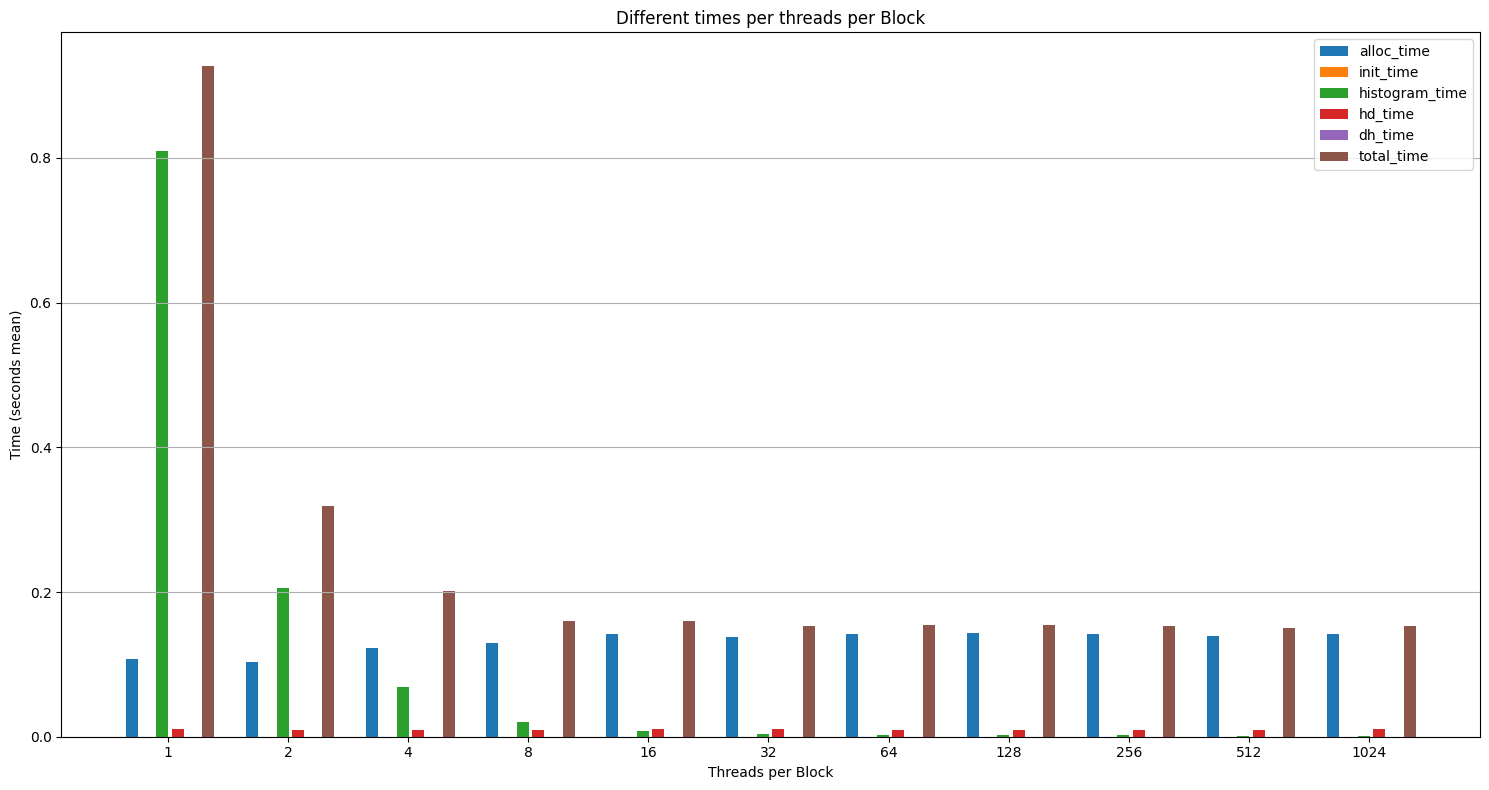

In [17]:
# Bar plot with all diferent times per threadsPerBlock unique values
# -----------------------------------------------------------------

data_filtered = data[data['imagePath'] == fixed_image]

unique_threadsPerBlock = data_filtered['threadsPerBlock'].unique()
n_groups = len(unique_threadsPerBlock)
metrics = ['alloc_time', 'init_time', 'histogram_time', 'hd_time', 'dh_time', 'total_time']
n_metrics = len(metrics)
bar_width = 0.1
index = np.arange(n_groups)

plt.figure(figsize=(15, 8))

for j, metric in enumerate(metrics):

	means = [data_filtered[data_filtered['threadsPerBlock'] == tp][metric].mean() for tp in unique_threadsPerBlock]
	plt.bar(index + j * bar_width * 1.275, means, bar_width, label=metric)

plt.xlabel('Threads per Block')
plt.ylabel('Time (seconds mean)')

plt.xticks(index + bar_width * (n_metrics / 2), unique_threadsPerBlock)

plt.title('Different times per threads per Block')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'times_per_threadsPerBlock.png'))

plt.show()

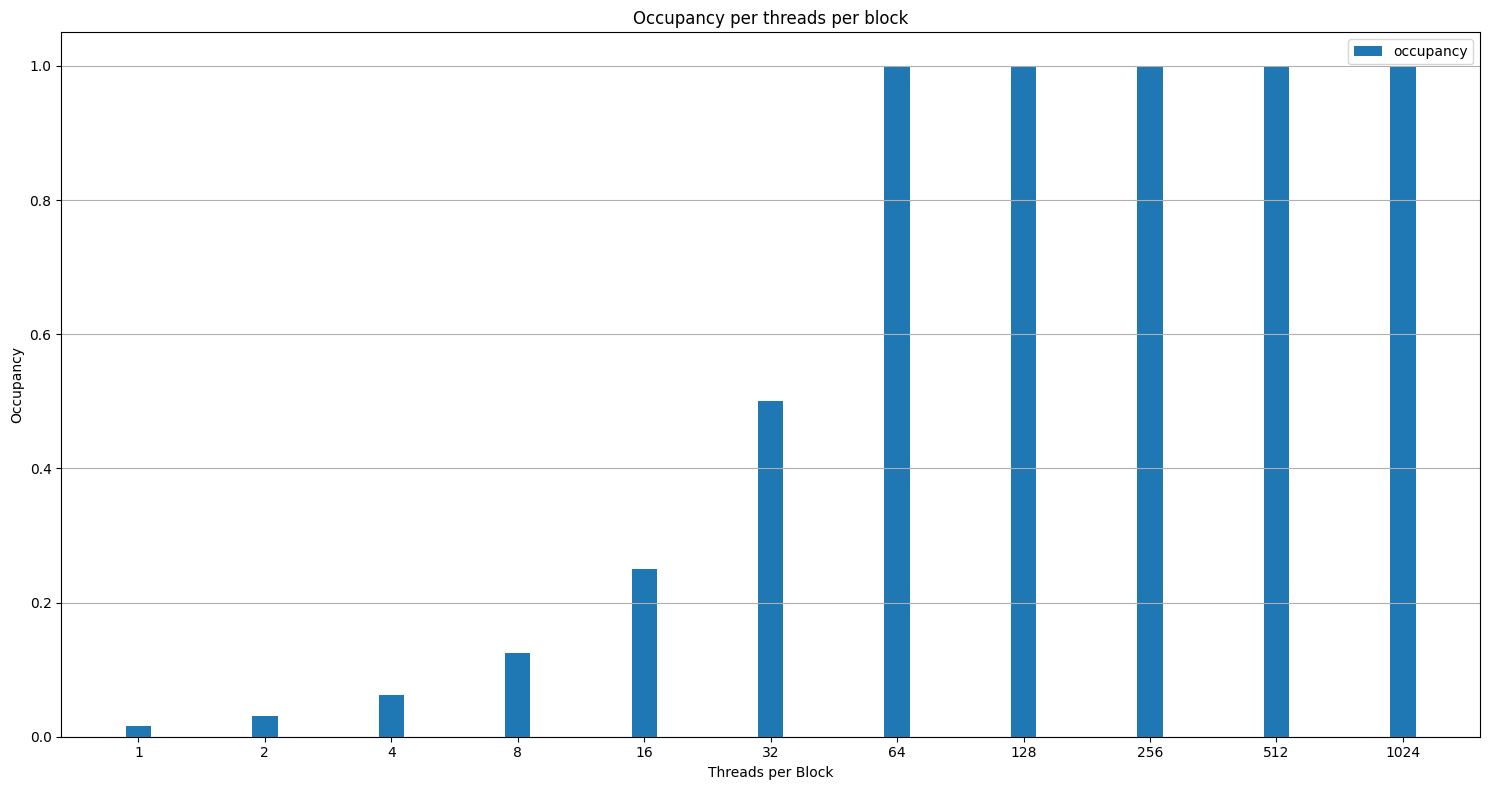

In [18]:

data_filtered = data[data['imagePath'] == fixed_image]

unique_threadsPerBlock = data_filtered['threadsPerBlock'].unique()
n_groups = len(unique_threadsPerBlock)
metrics = ['occupancy']
n_metrics = len(metrics)

bar_width = 0.2
index = np.arange(n_groups)

plt.figure(figsize=(15, 8))

for j, metric in enumerate(metrics):

	means = [data_filtered[data_filtered['threadsPerBlock'] == tp][metric].mean() for tp in unique_threadsPerBlock]
	plt.bar(index + j * bar_width, means, bar_width, label=metric)

plt.xlabel('Threads per Block')
plt.ylabel('Occupancy')
plt.xticks(index, unique_threadsPerBlock)

plt.title('Occupancy per threads per block')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'occupancy_per_threadsPerBlock.png'))

plt.show()

In [ ]:
finalData = []

data_filtered = data

min_process = data_filtered['threadsPerBlock'].min()

ref_dataset = data_filtered[data_filtered['threadsPerBlock'] == min_process]

ref_times = ref_dataset.groupby('imagePath')['histogram_time'].max()

for (image_value, threads_value), group in data_filtered.groupby(['imagePath', 'threadsPerBlock']):

	max_compute_time = group['histogram_time'].max()
	max_total_time = group['total_time'].max()

	ref_time = ref_times.get(image_value, None)

	speedup = ref_time / max_compute_time
	efficiency = speedup / threads_value

	# Secuential daxpy time 0.8514 seconds and total time 4.3128s
	# Histogram - 0.2045 seconds and 0.6341 seconds

	secuential_compute_speedup = 0.2045/ max_compute_time
	secuential_total_speedup = 0.6341 / max_total_time

	quality = 1 / max_compute_time

	finalData.append([threads_value, image_value, max_compute_time, ref_time, speedup, efficiency, quality, secuential_compute_speedup, secuential_total_speedup])

final_df = pd.DataFrame(finalData, columns=['threads', 'imagePath', 'MaxTime', 'RefTime', 'Speedup', 'Efficiency', 'Quality', 'SecuentialComputeSpeedup', 'SecuentialTotalSpeedup'])

display(final_df)

# Generate table latex code for the final_df DataFrame fixed to 2 decimal places
# final_df.to_latex(os.path.join(images_dir, 'final_df.tex'), index=False, float_format="%.2f")

,threads,imagePath,MaxTime,RefTime,Speedup,Efficiency,Quality,SecuentialComputeSpeedup,SecuentialTotalSpeedup
0,1,./images/grayscale_by_cols.pgm,0.858858,0.858858,1.000000,1.000000,1.164337,0.238107,0.622055
1,2,./images/grayscale_by_cols.pgm,0.205811,0.858858,4.173038,2.086519,4.858821,0.993629,1.932449
2,4,./images/grayscale_by_cols.pgm,0.083809,0.858858,10.247793,2.561948,11.931881,2.440070,2.699385
3,8,./images/grayscale_by_cols.pgm,0.026912,0.858858,31.913543,3.989193,37.158108,7.598833,3.191214
4,16,./images/grayscale_by_cols.pgm,0.009535,0.858858,90.073676,5.629605,104.876081,21.447159,3.629568
5,32,./images/grayscale_by_cols.pgm,0.004615,0.858858,186.117927,5.816185,216.703923,44.315952,3.751554
6,64,./images/grayscale_by_cols.pgm,0.003048,0.858858,281.817954,4.403406,328.130970,67.102783,2.849362
7,128,./images/grayscale_by_cols.pgm,0.002232,0.858858,384.801622,3.006263,448.038629,91.623900,3.762758
8,256,./images/grayscale_by_cols.pgm,0.001915,0.858858,448.449671,1.751757,522.146384,106.778936,3.665774
9,512,./images/grayscale_by_cols.pgm,0.001726,0.858858,497.490624,0.971661,579.246563,118.455922,3.919810


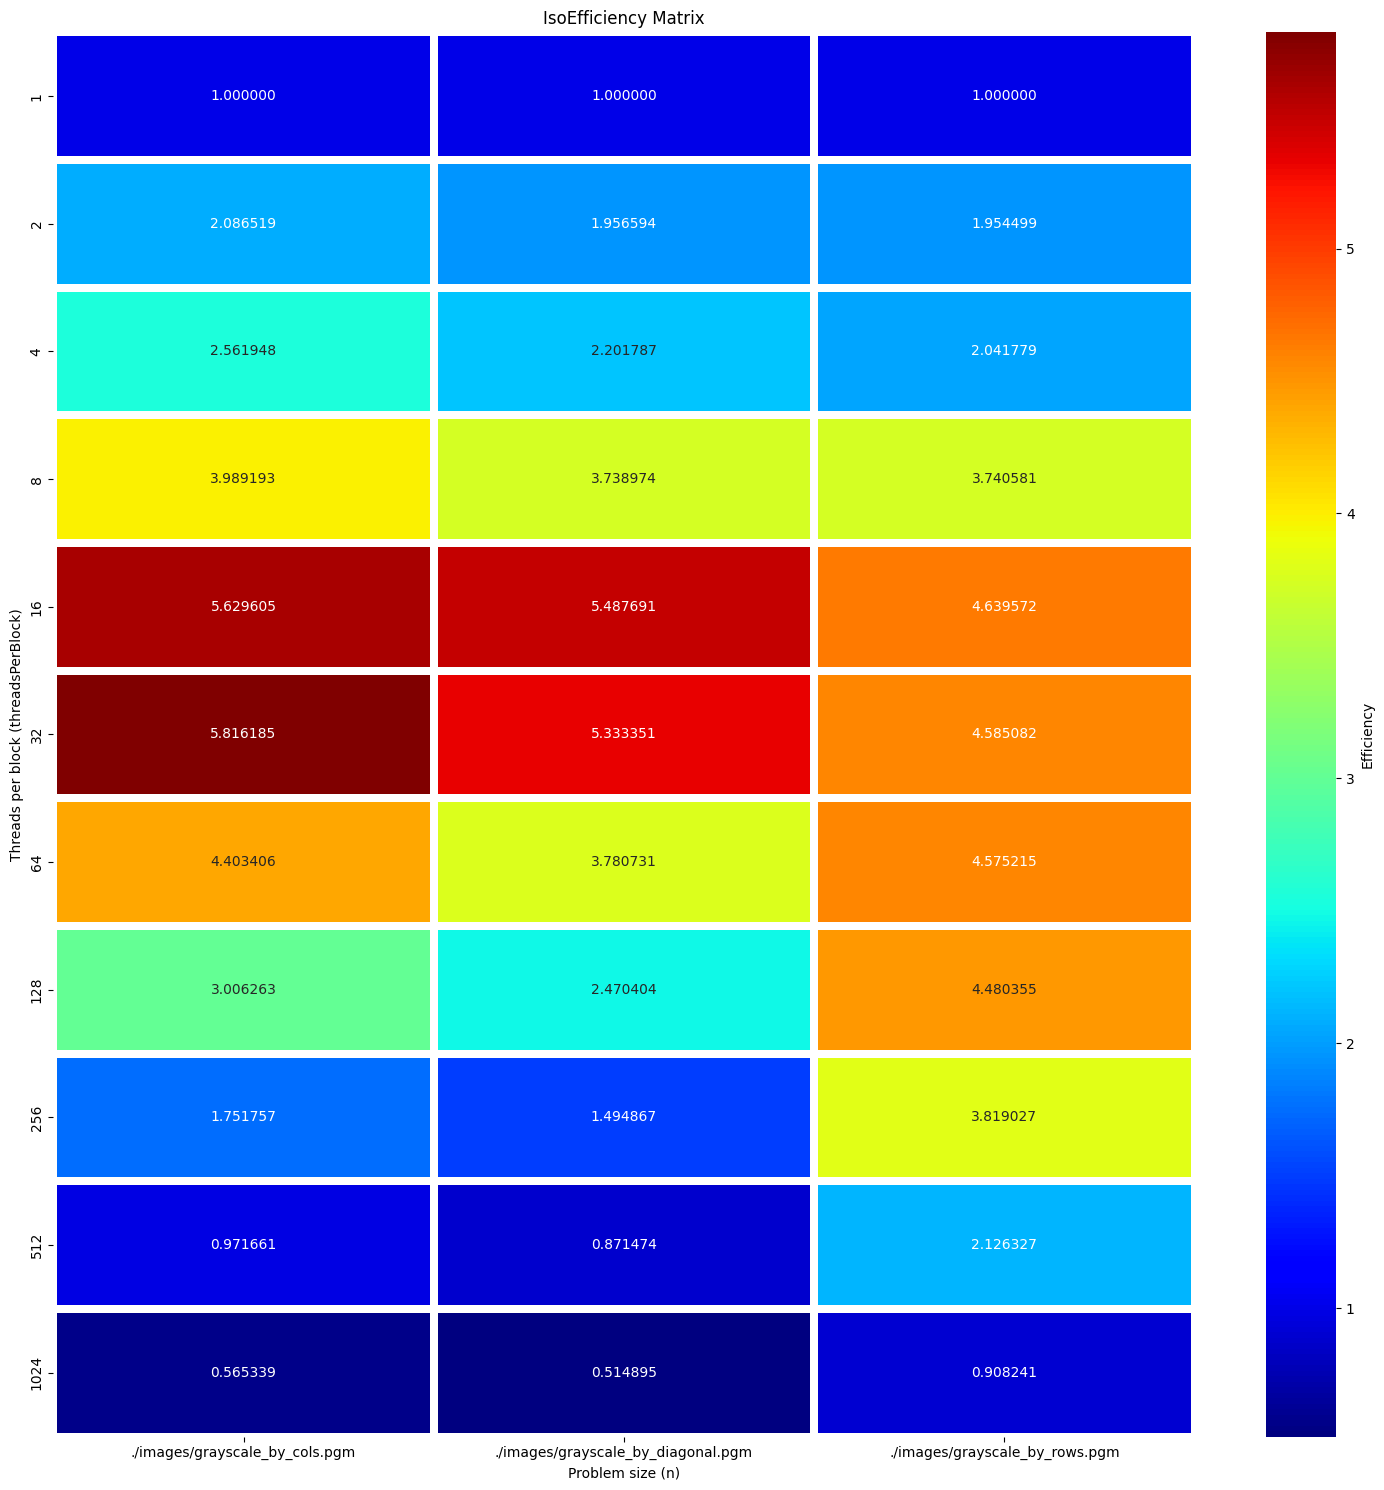

In [20]:
efficiency_matrix = final_df.pivot(index='threads', columns='imagePath', values='Efficiency')

plt.figure(figsize=(15, 15))

ax = sns.heatmap(efficiency_matrix, annot=True, fmt=".6f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=4.5, linecolor='white')

ax.set_title("IsoEfficiency Matrix")
ax.set_xlabel("Problem size (n)")
ax.set_ylabel("Threads per block (threadsPerBlock)")

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoEfficiencyMatrix.png'))

plt.show()